In [254]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Spiral Dataset

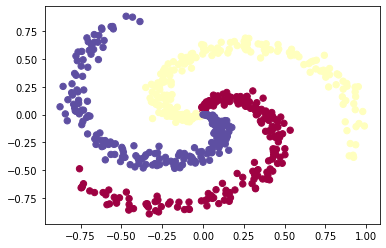

In [255]:
# number of points per class
N = 200 

# dimensionality
D = 2 
# number of classes
K = 3 

# data matrix (each row = single example)
X = np.zeros((N*K, D)) 

# class labels
y = np.zeros(N*K, dtype='uint8') 

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
  
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

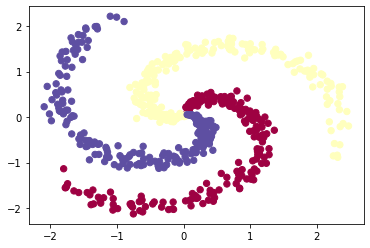

In [256]:
# Normalize the dataset
X = (X - np.mean(X))/np.std(X)

# Lets visualize the data again
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [257]:
y_one_hot = keras.utils.to_categorical(y, num_classes=K)

In [258]:
print("Shape of X = ", X.shape)
print("Shape of y = ", y_one_hot.shape)

Shape of X =  (600, 2)
Shape of y =  (600, 3)


In [259]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)

In [260]:
print("Shape of X_train = ", X_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (480, 2)
Shape of X_test =  (120, 2)
Shape of y_train =  (480, 3)
Shape of y_test =  (120, 3)


In [261]:
# Use tensorflow data structure
def create_dataset(X, y):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.shuffle(buffer_size=len(X))
    return ds

# Create train and test tf datasets
train_ds = create_dataset(X_train, y_train)
test_ds = create_dataset(X_test, y_test)

In [262]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [263]:
for input, target in train_ds.take(1):
    print("Input = ", input)
    print("Target = ", target)
    print("Shape of input = ", input.shape)

Input =  tf.Tensor([1.67750589 1.2115945 ], shape=(2,), dtype=float64)
Target =  tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
Shape of input =  (2,)


In [264]:
# Create batches of 32 samples
train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

In [265]:
for input, target in train_ds.take(1):
    print("Shape of input = ", input.shape)
    print("Shape of target = ", target.shape)

Shape of input =  (32, 2)
Shape of target =  (32, 3)


In [266]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [267]:
print("Number of batches = ", len(train_ds))

Number of batches =  15


# Build Models

In [268]:
epochs = 100

## Build model \#1 - Single hidden layer, 8 neurons

In [269]:
# Input layer
inputs = keras.Input(shape=D)

# Hidden layer
x = layers.Dense(8, activation="relu")(inputs)
x = layers.Dropout(0.2)(x)

# Output
output = layers.Dense(K, activation="softmax")(x)

# Define model
model = keras.Model(inputs, output)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

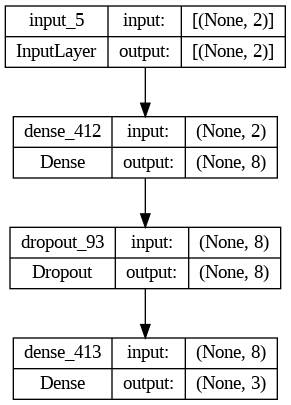

In [270]:
keras.utils.plot_model(model, show_shapes=True)

In [271]:
# Fit the model
model.fit(train_ds, epochs=epochs, validation_data=test_ds)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 1.1718 - accuracy: 0.3250 - val_loss: 1.1600 - val_accuracy: 0.3167
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1623 - accuracy: 0.3604 - val_loss: 1.1376 - val_accuracy: 0.4167
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1187 - accuracy: 0.4167 - val_loss: 1.1173 - val_accuracy: 0.4417
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0909 - accuracy: 0.4458 - val_loss: 1.0999 - val_accuracy: 0.4500
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 0.4625 - val_loss: 1.0834 - val_accuracy: 0.4167
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0678 - accuracy: 0.4500 - val_loss: 1.0688 - val_accuracy: 0.4000
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0386 - accuracy: 0.4396 - val_loss: 1.0546 - val_accuracy: 0.3667
Epoch 8/100


## Build model \#2 - Single hidden layer, 16 neurons

In [272]:
# Input layer
inputs = keras.Input(shape=D)

# Hidden layer
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dropout(0.2)(x)

# Output
output = layers.Dense(K, activation="softmax")(x)

# Define model
model = keras.Model(inputs, output)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

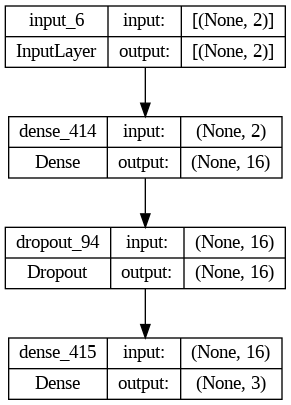

In [273]:
keras.utils.plot_model(model, show_shapes=True)

In [274]:
model.fit(train_ds, epochs=epochs, validation_data=test_ds)

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 1.2533 - accuracy: 0.1625 - val_loss: 1.2065 - val_accuracy: 0.2083
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2188 - accuracy: 0.1813 - val_loss: 1.1638 - val_accuracy: 0.2417
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1543 - accuracy: 0.2500 - val_loss: 1.1296 - val_accuracy: 0.2917
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1093 - accuracy: 0.2708 - val_loss: 1.0997 - val_accuracy: 0.3083
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.2833 - val_loss: 1.0741 - val_accuracy: 0.3167
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0471 - accuracy: 0.3479 - val_loss: 1.0523 - val_accuracy: 0.3833
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0228 - accuracy: 0.3854 - val_loss: 1.0315 - val_accuracy: 0.3833
Epoch 8/100


## Build model \#3 - Two hidden layers, 8 neurons

In [275]:
# Input layer
inputs = keras.Input(shape=D)

# Hidden layer 1
x = layers.Dense(8, activation="relu")(inputs)
x = layers.Dropout(0.2)(x)

# Hidden layer 2
x = layers.Dense(8, activation="relu")(x)
x = layers.Dropout(0.2)(x)

# Output
output = layers.Dense(K, activation="softmax")(x)

# Define model
model = keras.Model(inputs, output)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

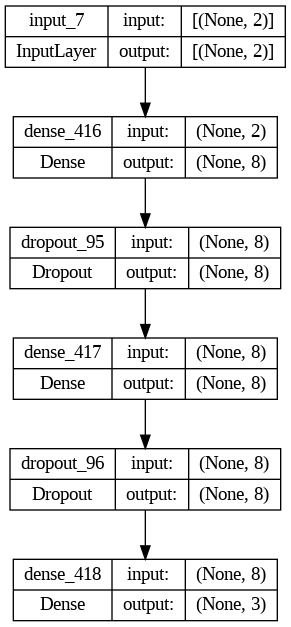

In [276]:
keras.utils.plot_model(model, show_shapes=True)

In [277]:
model.fit(train_ds, epochs=epochs, validation_data=test_ds)

Epoch 1/100
15/15 [==============================] - 2s 20ms/step - loss: 1.2450 - accuracy: 0.2562 - val_loss: 1.2011 - val_accuracy: 0.2333
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2079 - accuracy: 0.2146 - val_loss: 1.1711 - val_accuracy: 0.2167
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1585 - accuracy: 0.2646 - val_loss: 1.1468 - val_accuracy: 0.2083
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1472 - accuracy: 0.2625 - val_loss: 1.1266 - val_accuracy: 0.2500
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1210 - accuracy: 0.2979 - val_loss: 1.1093 - val_accuracy: 0.3083
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1066 - accuracy: 0.2958 - val_loss: 1.0948 - val_accuracy: 0.3750
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.3625 - val_loss: 1.0822 - val_accuracy: 0.4167
Epoch 8/100


## Build model \#4 - Two hidden layers, 16 neurons

In [278]:
# Input layer
inputs = keras.Input(shape=D)

# Hidden layer 1
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dropout(0.2)(x)

# Hidden layer 2
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.2)(x)

# Output
output = layers.Dense(K, activation="softmax")(x)

# Define model
model = keras.Model(inputs, output)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

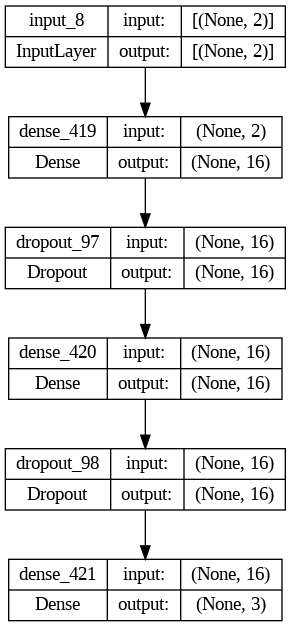

In [279]:
keras.utils.plot_model(model, show_shapes=True)

In [280]:
# Fit the model
model.fit(train_ds, epochs=epochs, validation_data=test_ds)

Epoch 1/100
15/15 [==============================] - 1s 20ms/step - loss: 1.0720 - accuracy: 0.3896 - val_loss: 1.0659 - val_accuracy: 0.3917
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0404 - accuracy: 0.4104 - val_loss: 1.0321 - val_accuracy: 0.4167
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0005 - accuracy: 0.4563 - val_loss: 1.0017 - val_accuracy: 0.3917
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9768 - accuracy: 0.4708 - val_loss: 0.9745 - val_accuracy: 0.4583
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9456 - accuracy: 0.4854 - val_loss: 0.9489 - val_accuracy: 0.4500
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9371 - accuracy: 0.4708 - val_loss: 0.9263 - val_accuracy: 0.4500
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8886 - accuracy: 0.5354 - val_loss: 0.9028 - val_accuracy: 0.4500
Epoch 8/100


# Prediction on Sample data

In [281]:
sample_data = [[0, -2], [0,1]]

sample_data_tensor = tf.convert_to_tensor(sample_data)

In [282]:
sample_data_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -2],
       [ 0,  1]], dtype=int32)>

In [283]:
preds = model.predict(sample_data_tensor)

1/1 [==============================] - 0s 88ms/step


In [284]:
# Sample 1
preds[0]

array([9.986481e-01, 1.743387e-05, 1.334503e-03], dtype=float32)

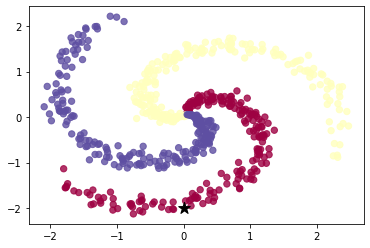

In [285]:
# Lets visualize the data again
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(sample_data[0][0], sample_data[0][1], c='black', s=150, marker='*')
plt.show()

In [286]:
# Sample 2
preds[1]

array([0.07396994, 0.9182875 , 0.00774247], dtype=float32)

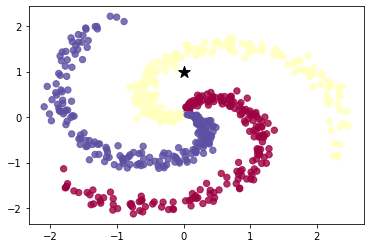

In [287]:
# Lets visualize the data again
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(sample_data[1][0], sample_data[1][1], c='black', s=150, marker='*')
plt.show()

## NEURAL NETWORK ON TITANIC DATASET

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from sklearn.preprocessing import StandardScaler

# Load data as Pandas dataframe, we will use all the data together 
train = pd.read_csv('train.csv', )
test = pd.read_csv('test.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [289]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


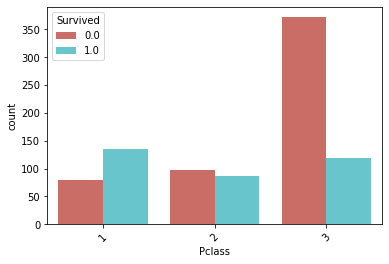

In [290]:
import seaborn as sns 
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

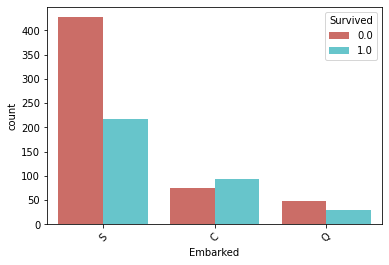

In [291]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

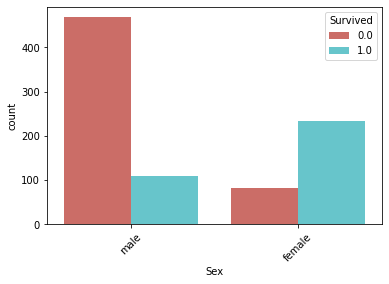

In [292]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [293]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [294]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [295]:
df.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0,1


In [296]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [297]:
df.head()
df.dropna(inplace = True)

## Prepare ML pipelines...

In [298]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis = 1), df['Survived'], test_size=0.33, random_state=42)

In [299]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    # fit and transform standard scaler on train data
    X_train[var] = X_train[var].astype('float64')
    X_train[var] = scaler.fit_transform(X_train[var].values.reshape(-1, 1))

    # scale the test data with the train scaler
    X_test[var] = X_test[var].astype('float64')
    X_test[var] = scaler.transform(X_test[var].values.reshape(-1,1))

In [300]:
df.describe()
df = df.dropna()

In [301]:
X_train.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S
271,-0.370550,-0.762482,-0.491315,0.942734,1,-0.549447,0,0,1
853,-0.978930,0.088210,0.643219,-1.428986,0,-0.549447,0,0,1
696,0.913807,-0.588673,-0.491315,0.942734,1,-0.549447,0,0,1
518,0.373025,-0.201111,-0.491315,-0.243126,0,0.572928,0,0,1
609,0.643416,2.550953,-0.491315,-1.428986,0,-0.549447,0,0,1


In [302]:
X_test.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S
149,0.778612,-0.481796,-0.491315,-0.243126,1,-0.549447,0,0,1
407,-1.857701,-0.357647,0.643219,-0.243126,1,0.572928,0,0,1
53,-0.100159,-0.201111,-0.491315,-0.243126,0,0.572928,0,0,1
369,-0.438148,0.733786,-0.491315,-1.428986,0,-0.549447,1,0,0
818,0.846209,-0.623219,-0.491315,0.942734,1,-0.549447,0,0,1


## Check values to ensure data was scaled

In [303]:
X_train.describe()

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S
count,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,478.000000,4.780000e+02,478.000000,478.000000,478.000000
mean,-3.716228e-17,2.601359e-17,9.290569e-18,-4.087850e-17,0.640167,-7.432455e-18,0.175732,0.043933,0.778243
std,1.001048e+00,1.001048e+00,1.001048e+00,1.001048e+00,0.480454,1.001048e+00,0.380991,0.205161,0.415864
min,-2.015204e+00,-7.624817e-01,-4.913152e-01,-1.428986e+00,0.000000,-5.494472e-01,0.000000,0.000000,0.000000
25%,-6.409412e-01,-5.886728e-01,-4.913152e-01,-1.428986e+00,0.000000,-5.494472e-01,0.000000,0.000000,1.000000
50%,-1.001592e-01,-4.159434e-01,-4.913152e-01,-2.431260e-01,1.000000,-5.494472e-01,0.000000,0.000000,1.000000
75%,5.758183e-01,3.648231e-02,6.432194e-01,9.427336e-01,1.000000,5.729278e-01,0.000000,0.000000,1.000000
max,3.347326e+00,4.915996e+00,6.315892e+00,9.427336e-01,1.000000,5.062428e+00,1.000000,1.000000,1.000000


In [304]:
X_test.describe()

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,-0.160046,-0.040500,-0.005773,0.113637,0.622881,0.078322,0.194915,0.029661,0.771186
std,0.935034,1.387723,0.899673,0.977395,0.485695,1.125164,0.396977,0.170011,0.420962
min,-2.032103,-0.762482,-0.491315,-1.428986,0.000000,-0.549447,0.000000,0.000000,0.000000
25%,-0.776137,-0.588673,-0.491315,-0.243126,0.000000,-0.549447,0.000000,0.000000,1.000000
50%,-0.235355,-0.450984,-0.491315,0.942734,1.000000,-0.549447,0.000000,0.000000,1.000000
75%,0.373025,-0.091671,0.643219,0.942734,1.000000,0.572928,0.000000,0.000000,1.000000
max,2.738946,10.299305,5.181357,0.942734,1.000000,5.062428,1.000000,1.000000,1.000000


## Build a simple model: 1 fully connected layer of 8 neurons

In [305]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # # set random seed for reproducibility
    # seed(42)
    # set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # create output layer
    model.add(Dense(1, activation='relu'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [306]:
model = create_model()
print(model.summary())

Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_422 (Dense)           (None, 8)                 80        
                                                                 
 dense_423 (Dense)           (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
None


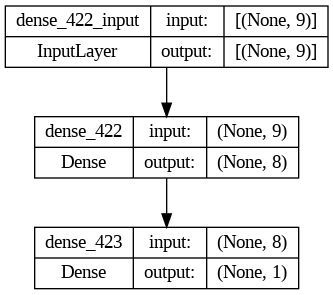

In [307]:
keras.utils.plot_model(model, show_shapes=True)

In [308]:
# train model on full train set, with 75/25 CV split
training = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.25, verbose=1)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))

Epoch 1/500
12/12 [==============================] - 2s 34ms/step - loss: 4.6363 - accuracy: 0.5559 - val_loss: 4.2637 - val_accuracy: 0.5917
Epoch 2/500
12/12 [==============================] - 0s 12ms/step - loss: 4.5253 - accuracy: 0.5754 - val_loss: 4.2460 - val_accuracy: 0.6000
Epoch 3/500
12/12 [==============================] - 0s 9ms/step - loss: 4.4402 - accuracy: 0.5838 - val_loss: 4.2464 - val_accuracy: 0.6000
Epoch 4/500
12/12 [==============================] - 0s 12ms/step - loss: 4.4240 - accuracy: 0.5866 - val_loss: 4.1900 - val_accuracy: 0.6083
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 4.4127 - accuracy: 0.6006 - val_loss: 4.3490 - val_accuracy: 0.6083
Epoch 6/500
12/12 [==============================] - 0s 8ms/step - loss: 4.4082 - accuracy: 0.5922 - val_loss: 4.2531 - val_accuracy: 0.6083
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 4.3993 - accuracy: 0.5894 - val_loss: 4.2522 - val_accuracy: 0.6167
Epoch 8/50

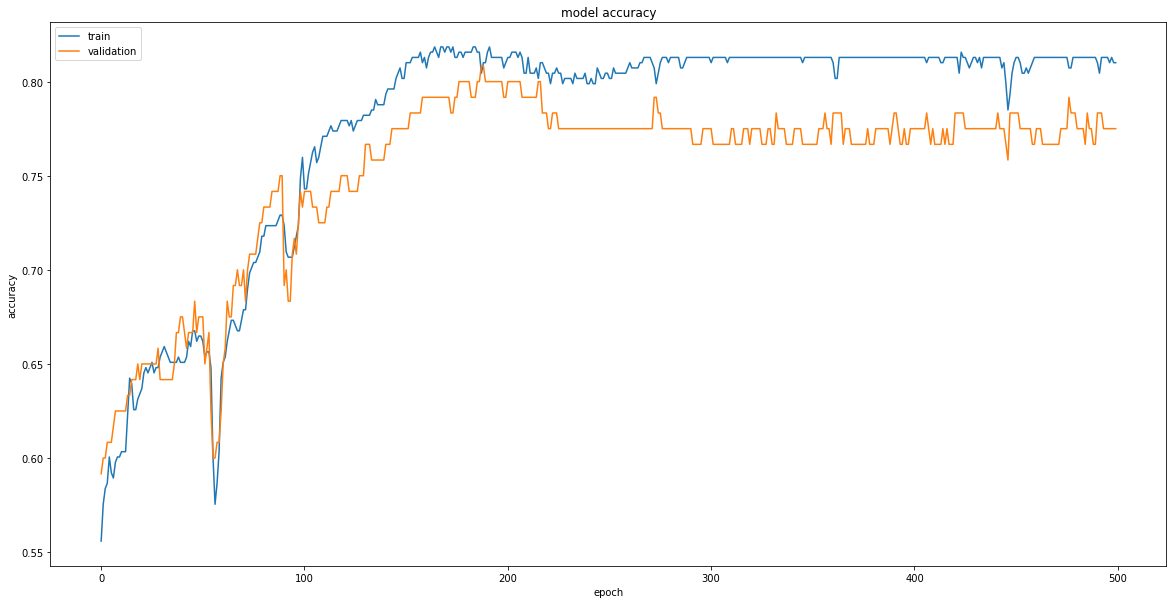

In [309]:
# summarize history for accuracy
plt.figure(figsize = (20,10))
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [310]:
# test set predictions
predictions = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [312]:
predictions = [1 if i>0.5 else 0 for i in predictions]
print(predictions[0:5])
print(y_test[0:5])

[0, 0, 1, 1, 0]
149    0.0
407    1.0
53     1.0
369    1.0
818    0.0
Name: Survived, dtype: float64


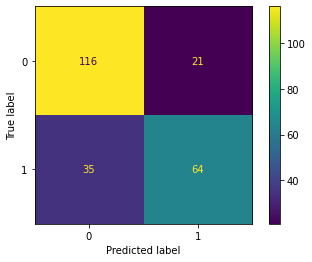

In [313]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [314]:
accuracy_score(y_test, predictions)

0.7627118644067796

## Search parameters: investigate batch size and number of epochs

In [315]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [100,300,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

<ipython-input-315-79e3080fbe3e>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..........................batch_size=16, epochs=100; total time=   7.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.8s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.1s
[CV] END ..........................batch_size=16, epochs=300; total time=  11.2s
[CV] END ..........................batch_size=16, epochs=300; total time=  11.0s
[CV] END ..........................batch_size=16, epochs=300; total time=  11.2s
[CV] END ..........................batch_size=16, epochs=500; total time=  21.4s
[CV] END ..........................batch_size=16, epochs=500; total time=  16.9s
[CV] END ..........................batch_size=16, epochs=500; total time=  17.2s
[CV] END ..........................batch_size=32, epochs=100; total time=   3.5s
[CV] END ..........................batch_size=32, epochs=100; total time=   2.6s
[CV] END ..........................batch_size=32,

In [316]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811806 using {'batch_size': 32, 'epochs': 500}
0.788745 (0.014138) with: {'batch_size': 16, 'epochs': 100}
0.793003 (0.043166) with: {'batch_size': 16, 'epochs': 300}
0.797170 (0.037888) with: {'batch_size': 16, 'epochs': 500}
0.678197 (0.140266) with: {'batch_size': 32, 'epochs': 100}
0.795086 (0.043032) with: {'batch_size': 32, 'epochs': 300}
0.811806 (0.031404) with: {'batch_size': 32, 'epochs': 500}
0.745021 (0.104880) with: {'batch_size': 64, 'epochs': 100}
0.759421 (0.041143) with: {'batch_size': 64, 'epochs': 300}
0.786661 (0.030841) with: {'batch_size': 64, 'epochs': 500}


## Now to investigate different optimizers

In [317]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=grid_result.best_params_['batch_size'], verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


<ipython-input-317-9737d18d400d>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=grid_result.best_params_['batch_size'], verbose=0)


[CV] END ............................................opt=SGD; total time=   2.7s
[CV] END ............................................opt=SGD; total time=   3.4s
[CV] END ............................................opt=SGD; total time=   2.8s
[CV] END ............................................opt=SGD; total time=   3.8s
[CV] END ............................................opt=SGD; total time=   3.5s
[CV] END ........................................opt=RMSprop; total time=   6.1s
[CV] END ........................................opt=RMSprop; total time=   2.8s
[CV] END ........................................opt=RMSprop; total time=   3.4s
[CV] END ........................................opt=RMSprop; total time=   6.0s
[CV] END ........................................opt=RMSprop; total time=   3.4s
[CV] END ........................................opt=Adagrad; total time=   3.3s
[CV] END ........................................opt=Adagrad; total time=   5.9s
[CV] END ...................

In [318]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.774254 using {'opt': 'RMSprop'}
0.677873 (0.047007) with: {'opt': 'SGD'}
0.774254 (0.087689) with: {'opt': 'RMSprop'}
0.574956 (0.130625) with: {'opt': 'Adagrad'}
0.556491 (0.081736) with: {'opt': 'Adadelta'}
0.759518 (0.099058) with: {'opt': 'Adam'}


## Try different networks (number of layers and neurons)

In [319]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


<ipython-input-319-b752dc89e677>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


[CV] END ...........................................lyrs=[8]; total time=   2.0s
[CV] END ...........................................lyrs=[8]; total time=   2.2s
[CV] END ...........................................lyrs=[8]; total time=   3.7s
[CV] END ...........................................lyrs=[8]; total time=   2.0s
[CV] END ...........................................lyrs=[8]; total time=   2.0s
[CV] END ..........................................lyrs=[10]; total time=   2.2s
[CV] END ..........................................lyrs=[10]; total time=   2.0s
[CV] END ..........................................lyrs=[10]; total time=   3.4s
[CV] END ..........................................lyrs=[10]; total time=   1.9s
[CV] END ..........................................lyrs=[10]; total time=   2.2s
[CV] END .......................................lyrs=[10, 5]; total time=   2.3s
[CV] END .......................................lyrs=[10, 5]; total time=   2.0s
[CV] END ...................

In [320]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797127 using {'lyrs': [10, 5]}
0.688465 (0.082355) with: {'lyrs': [8]}
0.573575 (0.168508) with: {'lyrs': [10]}
0.797127 (0.054761) with: {'lyrs': [10, 5]}
0.773882 (0.045995) with: {'lyrs': [12, 6]}
0.788794 (0.038757) with: {'lyrs': [12, 8, 4]}


In [321]:
# create final model
model = create_model(lyrs=[10,5], opt = 'RMSprop')

print(model.summary())

Model: "sequential_259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_605 (Dense)           (None, 10)                100       
                                                                 
 dense_606 (Dense)           (None, 5)                 55        
                                                                 
 dense_607 (Dense)           (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [322]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=500, batch_size=16, 
                     validation_split=0.2, verbose=1)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/500
24/24 [==============================] - 1s 16ms/step - loss: 3.8951 - accuracy: 0.6257 - val_loss: 3.6735 - val_accuracy: 0.6458
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 3.8085 - accuracy: 0.6335 - val_loss: 3.5466 - val_accuracy: 0.6354
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 3.6779 - accuracy: 0.6021 - val_loss: 3.0959 - val_accuracy: 0.5625
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 3.6117 - accuracy: 0.5812 - val_loss: 3.0872 - val_accuracy: 0.5729
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 3.5399 - accuracy: 0.5942 - val_loss: 2.9419 - val_accuracy: 0.6354
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 3.4571 - accuracy: 0.6230 - val_loss: 3.0665 - val_accuracy: 0.6875
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 3.0674 - accuracy: 0.6492 - val_loss: 2.7269 - val_accuracy: 0.6667
Epoch 8/500


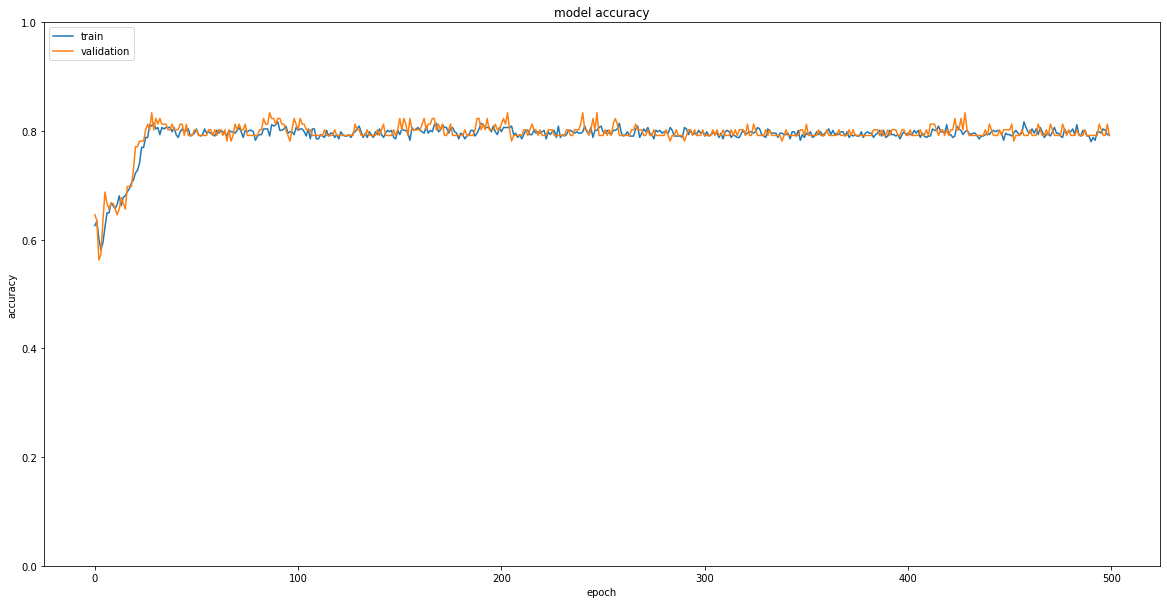

In [323]:
plt.figure(figsize = (20,10))
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0,1)
plt.show()

In [324]:
# test set predictions
predictions = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [325]:
predictions_class = [1 if i>0.5 else 0 for i in predictions]

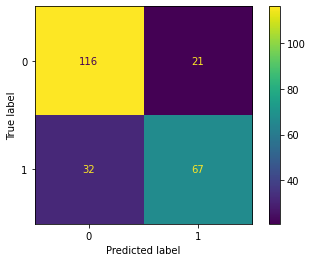

In [326]:
cm = confusion_matrix(y_test, predictions_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [327]:
accuracy_score(y_test, predictions_class)

0.7754237288135594